# Regularization Techniques

In [14]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [3]:
#importing the dataset
boston_dataset = datasets.load_boston()

In [6]:

#column names 
boston_df_columns = boston_dataset.feature_names
#Creating the dataframe 
boston_df = pd.DataFrame(boston_dataset.data,columns=boston_df_columns)
#Getting the target variables
boston_df_target = boston_dataset.target
boston_df['House_price']=pd.Series(boston_df_target)
print(boston_df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  House_price  
0       15.3  396.90   4.98         24.0  
1       17.8 

In [11]:
#Splitting the data
x_train,x_test,y_train,y_test = train_test_split(boston_df.iloc[:,:-1],boston_df.iloc[:,-1],test_size=0.25)
print("Size of xtrain = %s and ytrain = %s"%(x_train.shape,y_train.shape))
print("Size of xtest = %s and ytest = %s"%(x_test.shape,y_test.shape))
                                                

Size of xtrain = (379, 13) and ytrain = (379,)
Size of xtest = (127, 13) and ytest = (127,)


In [12]:
#Apply multiple Linear Regreswsion Model
lreg = LinearRegression()
lreg.fit(x_train,y_train)

lreg_y_pred = lreg.predict(x_test)

#Calculating the mean squred error (MSE)
mean_squre_error = np.mean((lreg_y_pred-y_test)**2)
print("Mean Square Error = ",mean_squre_error)

#Getting the co-efficients
lreg_coefficient = pd.DataFrame()
lreg_coefficient['Columns']=x_train.columns
lreg_coefficient['Coefficient Estimates']=pd.Series(lreg.coef_)
print(lreg_coefficient)

Mean Square Error =  19.109649590886875
    Columns  Coefficient Estimates
0      CRIM              -0.120065
1        ZN               0.038340
2     INDUS              -0.011706
3      CHAS               3.156619
4       NOX             -15.411771
5        RM               3.236543
6       AGE               0.004955
7       DIS              -1.414796
8       RAD               0.313388
9       TAX              -0.011190
10  PTRATIO              -1.014310
11        B               0.007440
12    LSTAT              -0.568565


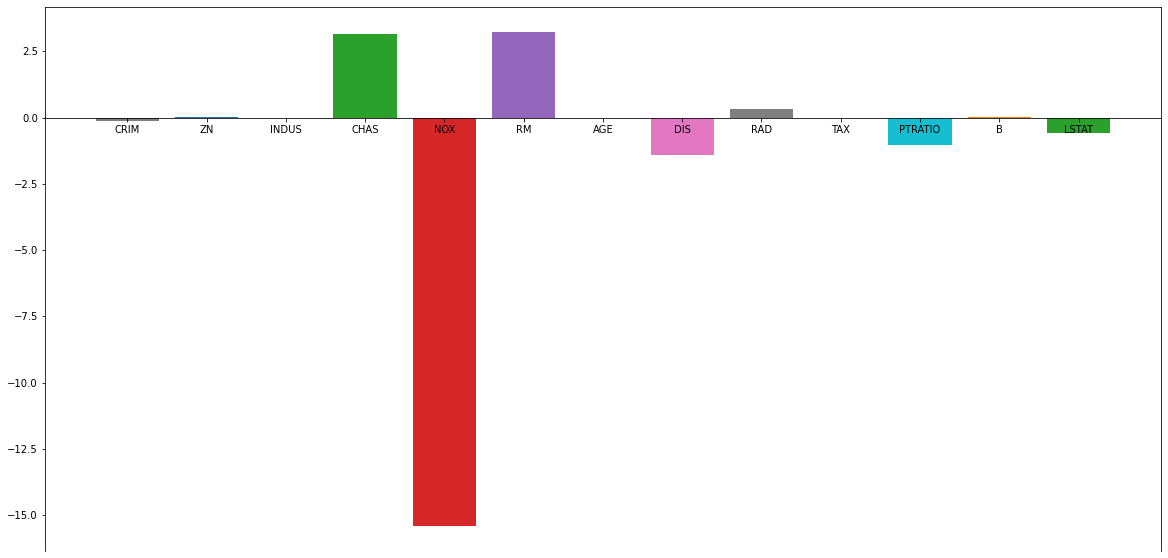

In [15]:
#plotting the coeefficient
fig, ax = plt.subplots(figsize=(20,10))
color=['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive']

ax.bar(lreg_coefficient['Columns'],lreg_coefficient['Coefficient Estimates'],color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [16]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1)
ridge.fit(x_train,y_train)

ridge_y_pred = ridge.predict(x_test)

#Calculating the mean squred error (MSE)
mean_squre_error_ridge = np.mean((ridge_y_pred-y_test)**2)
print("Mean Square Error = ",mean_squre_error_ridge)

#Getting the co-efficients
ridge_coefficient = pd.DataFrame()
ridge_coefficient['Columns']=x_train.columns
ridge_coefficient['Coefficient Estimates']=pd.Series(ridge.coef_)
print(ridge_coefficient)

Mean Square Error =  19.779119235085535
    Columns  Coefficient Estimates
0      CRIM              -0.116454
1        ZN               0.039933
2     INDUS              -0.044185
3      CHAS               3.111133
4       NOX              -8.082221
5        RM               3.281890
6       AGE              -0.000576
7       DIS              -1.310314
8       RAD               0.297171
9       TAX              -0.011803
10  PTRATIO              -0.925375
11        B               0.007618
12    LSTAT              -0.581343


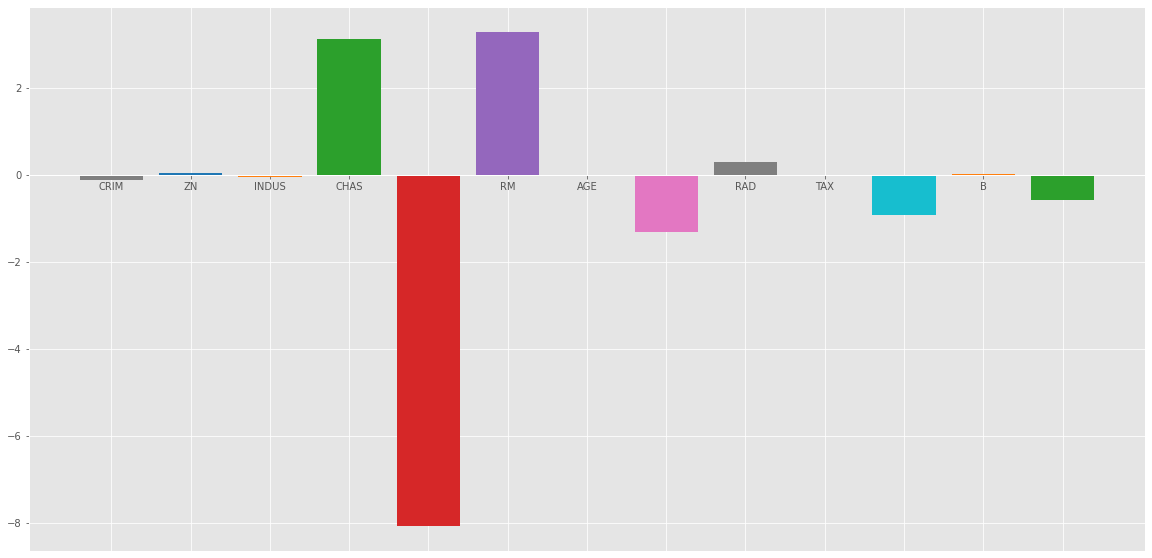

In [17]:
#plotting the coeefficient
fig, ax = plt.subplots(figsize=(20,10))
color=['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive']

ax.bar(ridge_coefficient['Columns'],ridge_coefficient['Coefficient Estimates'],color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [18]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1)
lasso.fit(x_train,y_train)

lasso_y_pred = lasso.predict(x_test)

#Calculating the mean squred error (MSE)
mean_squre_error_lasso = np.mean((lasso_y_pred-y_test)**2)
print("Mean Square Error = ",mean_squre_error_lasso)

#Getting the co-efficients
lasso_coefficient = pd.DataFrame()
lasso_coefficient['Columns']=x_train.columns
lasso_coefficient['Coefficient Estimates']=pd.Series(ridge.coef_)
print(lasso_coefficient)

Mean Square Error =  26.12327807792704
    Columns  Coefficient Estimates
0      CRIM              -0.116454
1        ZN               0.039933
2     INDUS              -0.044185
3      CHAS               3.111133
4       NOX              -8.082221
5        RM               3.281890
6       AGE              -0.000576
7       DIS              -1.310314
8       RAD               0.297171
9       TAX              -0.011803
10  PTRATIO              -0.925375
11        B               0.007618
12    LSTAT              -0.581343


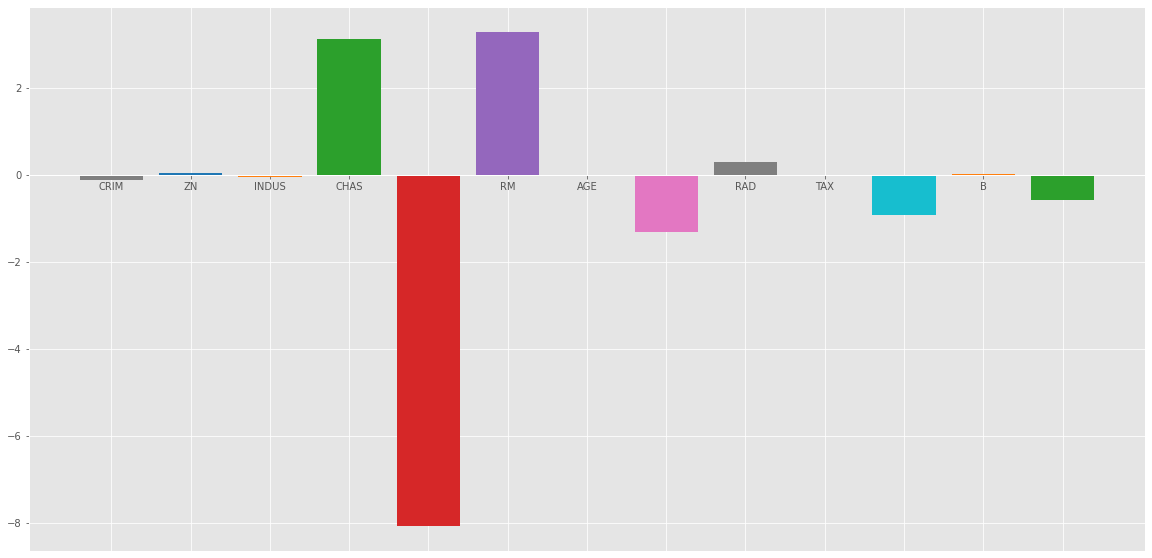

In [19]:
#plotting the coeefficient
fig, ax = plt.subplots(figsize=(20,10))
color=['tab:gray','tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink','tab:gray','tab:olive','tab:cyan','tab:orange','tab:green','tab:blue','tab:olive']

ax.bar(lasso_coefficient['Columns'],lasso_coefficient['Coefficient Estimates'],color=color)

ax.spines['bottom'].set_position('zero')
plt.style.use('ggplot')
plt.show()

In [20]:
!git init

Reinitialized existing Git repository in C:/Users/Sreelaksmi/Documents/.git/


In [ ]:
!git add RegularizationTechniques.ip